In [2]:
try:
    from tqdm import tqdm
except ImportError:
    def tqdm(iterator, *args, **kwargs):
        return iterator
import os, sys, glob, warnings, glob    
import numpy as np
import scipy as sp
from scipy import constants
from pylab import *
import joblib
import importlib
from importlib import reload
sys.path.append("/home/owhgabri/My_GitHub/pyTracker/tracker")
sys.path.insert(1, "/home/owhgabri/My_GitHub/pyTracker/tracker")
os.chdir('/home/owhgabri/My_GitHub/pyTracker')
print(os.getcwd())
print(joblib.__version__)

/home/owhgabri/My_GitHub/pyTracker
1.4.2


In [3]:
import scipy
import copy as cp

# ROOT
import ROOT as root

# Matplotlib
import matplotlib.pyplot as plt
from matplotlib import collections, colors, transforms

%matplotlib inline
%config InlineBackend.figure_format='retina'
# %matplotlib widget

import pprint

Welcome to JupyROOT 6.26/14


In [4]:
import kalmanfilter as KF
import utilities as Util
import trackfinder as TF
import datatypes
from datatypes import *

reload(TF)
reload(Util)

<module 'utilities' from '/home/owhgabri/My_GitHub/pyTracker/tracker/utilities.py'>

In [5]:
data_top_dir = f"/home/owhgabri/My_GitHub/data/Reconstruction/10xCosmicBackground"
pathList=[]

for rootFile, dirs, files in os.walk(data_top_dir):
    for filename in files:
        if ".pkl" in filename:
            pathList.append(os.path.join(rootFile, filename))


print(len(pathList))

98


In [6]:
all_hits = [] # List of lists: each sublist is an event
all_tracks = [] #List of lists: each sublist is an event
all_vertices = [] #List of lists: each sublist is an event
nTracks = []
nVertices = []
for f in pathList: # Go through each file
    events=joblib.load(f)
    file_hits = events["hits"]
    file_tracks = events["tracks"]
    file_vertices = events["vertices"]
    for i in range(len(file_hits)): # For each event
        hits= file_hits[i]
        tracks = file_tracks[i]
        vertices = file_vertices[i]
        all_hits.append(hits)
        all_tracks.append(tracks)
        all_vertices.append(vertices)
        nTracks.append(len(tracks))
        nVertices.append(len(vertices))
        

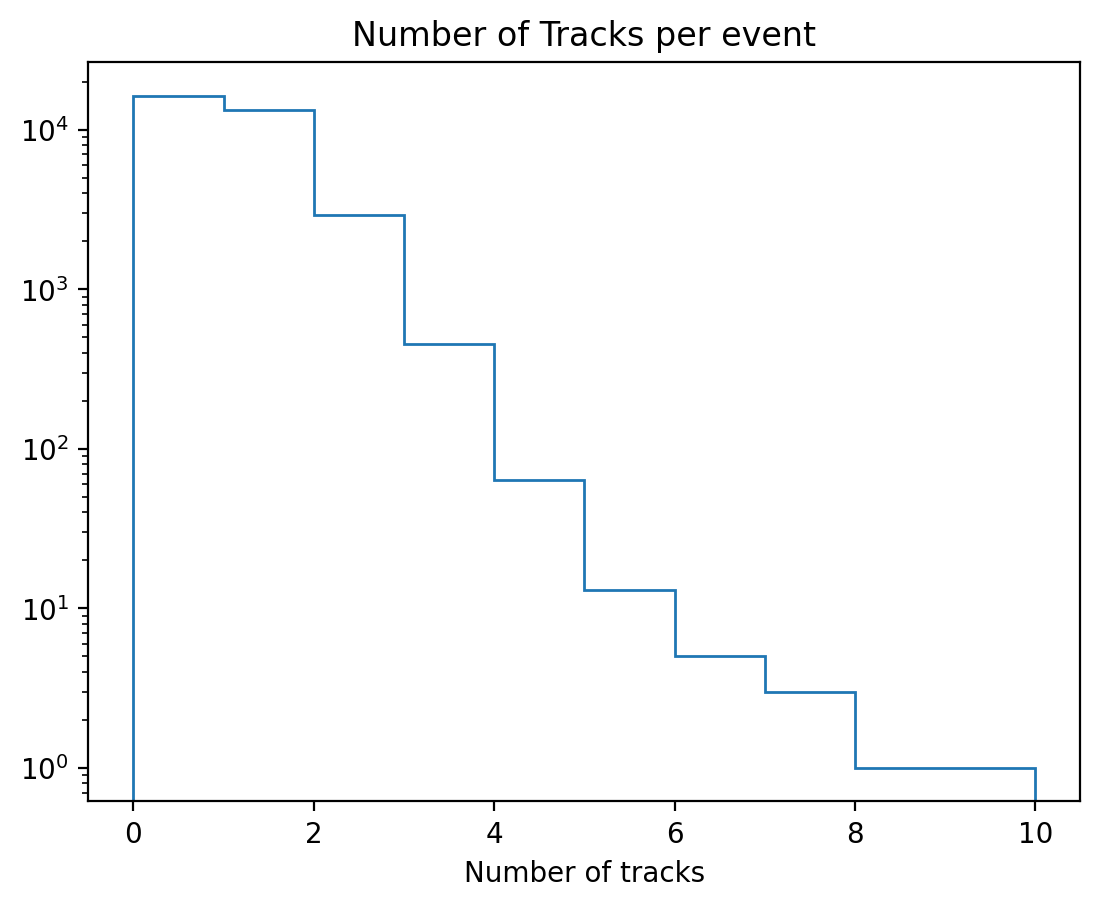

Total Entries: 33050
[16314 13254  2940   455    64    13     5     3     1     1]


In [7]:
counts,bins = np.histogram(nTracks, bins=[0,1,2,3,4,5,6,7,8,9,10])
plt.stairs(counts,bins)
plt.xlabel("Number of tracks")
plt.title("Number of Tracks per event")
plt.yscale("log")
plt.show()

print("Total Entries:", sum(counts))
print(counts)

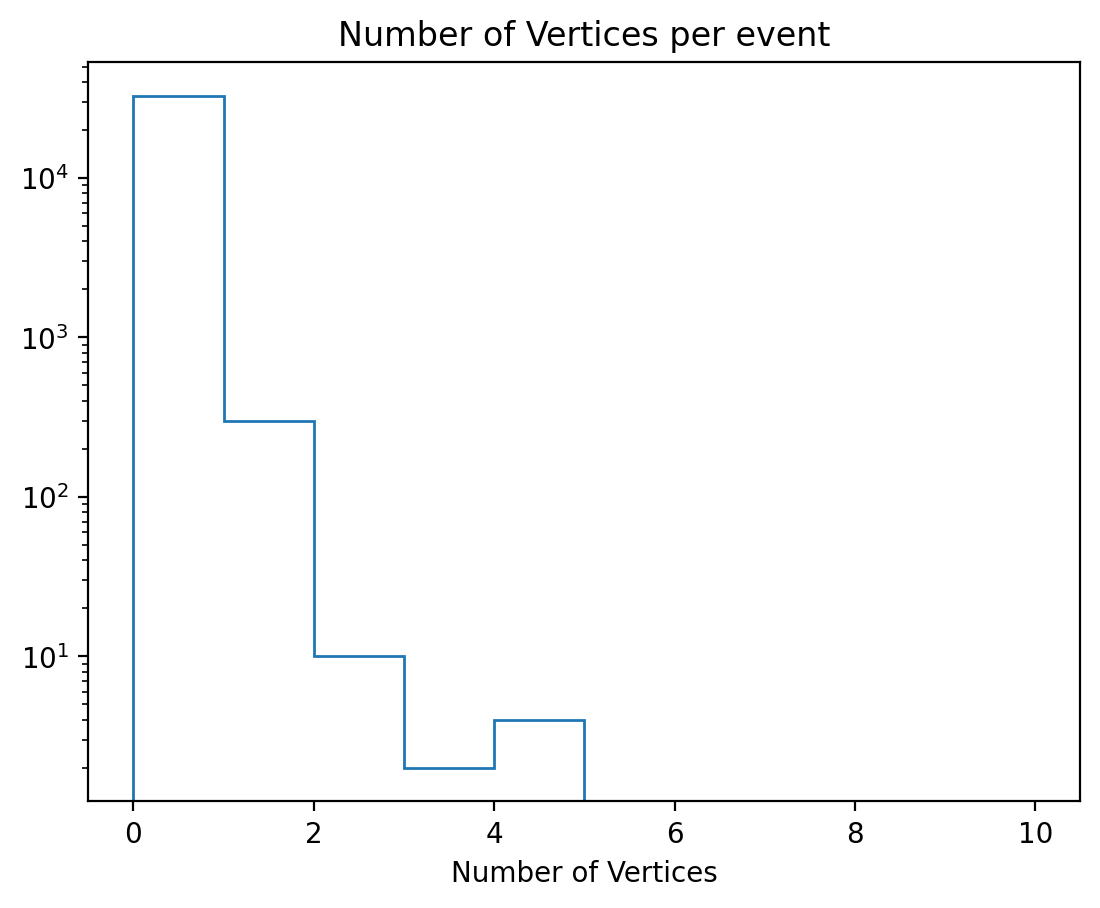

Total Entries: 33053
[32739   298    10     2     4     0     0     0     0     0]


In [8]:
counts,bins = np.histogram(nVertices, bins=[0,1,2,3,4,5,6,7,8,9,10])
plt.stairs(counts,bins)
plt.xlabel("Number of Vertices")
plt.title("Number of Vertices per event")
plt.yscale("log")
plt.show()

print("Total Entries:", sum(counts))
print(counts)